In [4]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...


True

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


In [14]:
import pandas as pd
df = pd.read_csv('./datasets/lyrics_processed.csv')
df.lyrics_processed = df.lyrics_processed.astype(str)
df.head()

,Id,Title,Lyrics,lyrics_processed
0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,Starboy The Weeknd,[Verse 1]\r\nI'm tryna put you in the worst mo...,i'm tryna put you in the worst mood ah p1 clea...
1,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,Closer The Chainsmokers,"[Verse 1: Andrew Taggart]\r\nHey, I was doing ...",hey i was doing just fine before i met you i d...
2,https://open.spotify.com/track/5knuzwU65gJK7IF...,Rockabye (feat. Sean Paul & Anne-Marie) Clean ...,[Intro: Sean Paul]\r\nCall it love and devotio...,call it love and devotion call it a mom's ador...
3,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,Let Me Love You DJ Snake,[Verse 1: Justin Bieber]\r\nI used to believe\...,i used to believe we were burnin' on the edge ...
4,https://open.spotify.com/track/3NdDpSvN911VPGi...,I Don’t Wanna Live Forever (Fifty Shades Darke...,[Verse 1: ZAYN]\r\nBeen sitting eyes wide open...,been sitting eyes wide open behind these four ...


In [15]:
example = 'The movie was awesome.'
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(example)

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [17]:
df[['neg', 'neu', 'pos', 'compound']] = df['lyrics_processed'].apply(sid.polarity_scores).apply(pd.Series)
df.head()
# df[['neg', 'neu', 'pos', 'compound']] = df['lyrics_processed'].apply(sid.polarity_scores)

,Id,Title,Lyrics,lyrics_processed,neg,neu,pos,compound
0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,Starboy The Weeknd,[Verse 1]\r\nI'm tryna put you in the worst mo...,i'm tryna put you in the worst mood ah p1 clea...,0.152,0.777,0.071,-0.9883
1,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,Closer The Chainsmokers,"[Verse 1: Andrew Taggart]\r\nHey, I was doing ...",hey i was doing just fine before i met you i d...,0.058,0.831,0.111,0.9597
2,https://open.spotify.com/track/5knuzwU65gJK7IF...,Rockabye (feat. Sean Paul & Anne-Marie) Clean ...,[Intro: Sean Paul]\r\nCall it love and devotio...,call it love and devotion call it a mom's ador...,0.058,0.712,0.229,0.9988
3,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,Let Me Love You DJ Snake,[Verse 1: Justin Bieber]\r\nI used to believe\...,i used to believe we were burnin' on the edge ...,0.213,0.575,0.212,0.9854
4,https://open.spotify.com/track/3NdDpSvN911VPGi...,I Don’t Wanna Live Forever (Fifty Shades Darke...,[Verse 1: ZAYN]\r\nBeen sitting eyes wide open...,been sitting eyes wide open behind these four ...,0.120,0.829,0.051,-0.9750


In [23]:
df[['polarity', 'subjectivity']] = df['lyrics_processed'].apply(lambda x:TextBlob(x).sentiment).to_list()

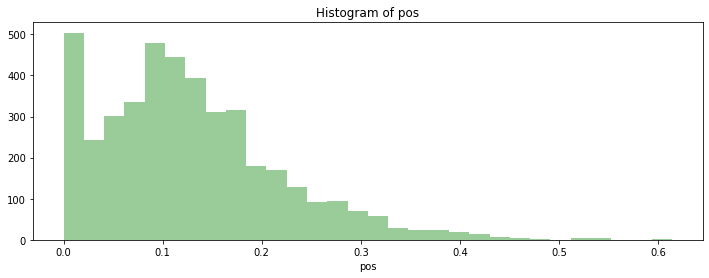

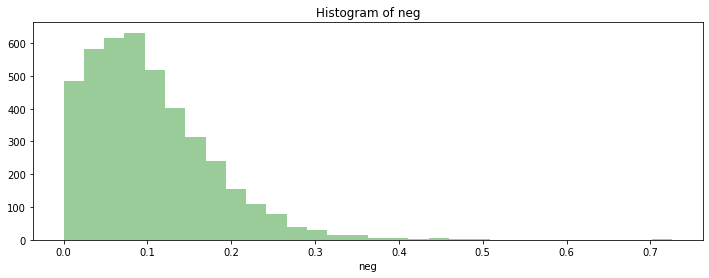

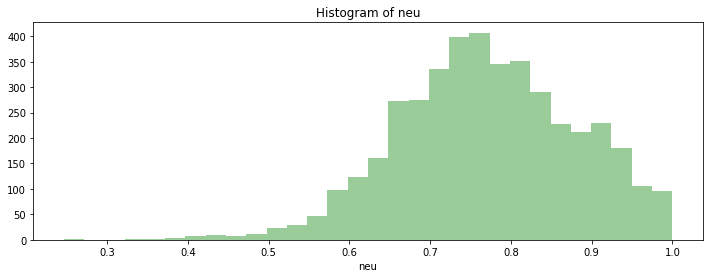

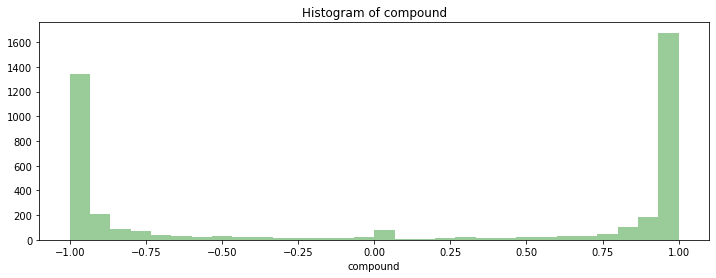

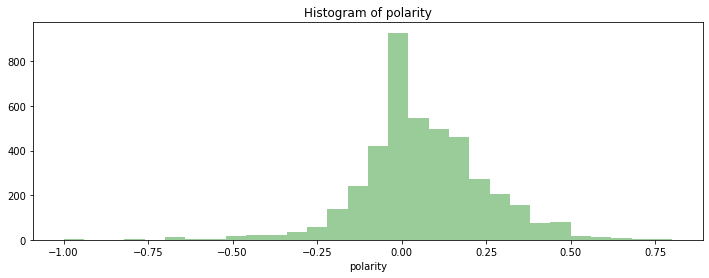

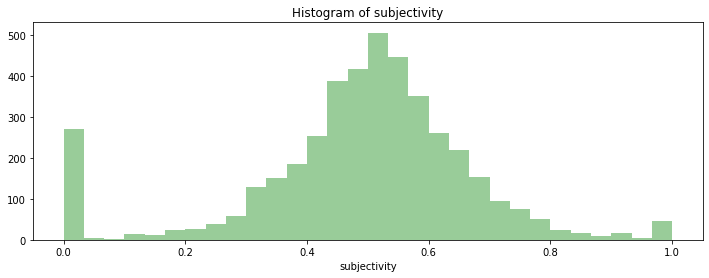

In [29]:
for var in ['pos', 'neg', 'neu', 'compound', 'polarity', 'subjectivity']:
    plt.figure(figsize=(12,4))
    sns.distplot(df[var], bins=30, kde=False, 
                 color='green')
    plt.title(f'Histogram of {var}')
    plt.savefig(f"./plots/final/hist_{var}.png")

In [24]:
df.head()

,Id,Title,Lyrics,lyrics_processed,neg,neu,pos,compound,polarity,subjectivity
0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,Starboy The Weeknd,[Verse 1]\r\nI'm tryna put you in the worst mo...,i'm tryna put you in the worst mood ah p1 clea...,0.152,0.777,0.071,-0.9883,0.131546,0.505317
1,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,Closer The Chainsmokers,"[Verse 1: Andrew Taggart]\r\nHey, I was doing ...",hey i was doing just fine before i met you i d...,0.058,0.831,0.111,0.9597,0.185065,0.411328
2,https://open.spotify.com/track/5knuzwU65gJK7IF...,Rockabye (feat. Sean Paul & Anne-Marie) Clean ...,[Intro: Sean Paul]\r\nCall it love and devotio...,call it love and devotion call it a mom's ador...,0.058,0.712,0.229,0.9988,0.262665,0.559491
3,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,Let Me Love You DJ Snake,[Verse 1: Justin Bieber]\r\nI used to believe\...,i used to believe we were burnin' on the edge ...,0.213,0.575,0.212,0.9854,0.355556,0.571981
4,https://open.spotify.com/track/3NdDpSvN911VPGi...,I Don’t Wanna Live Forever (Fifty Shades Darke...,[Verse 1: ZAYN]\r\nBeen sitting eyes wide open...,been sitting eyes wide open behind these four ...,0.120,0.829,0.051,-0.9750,-0.060331,0.375758


In [25]:
df.to_csv('./datasets/lyrics_processed.csv', index=False)

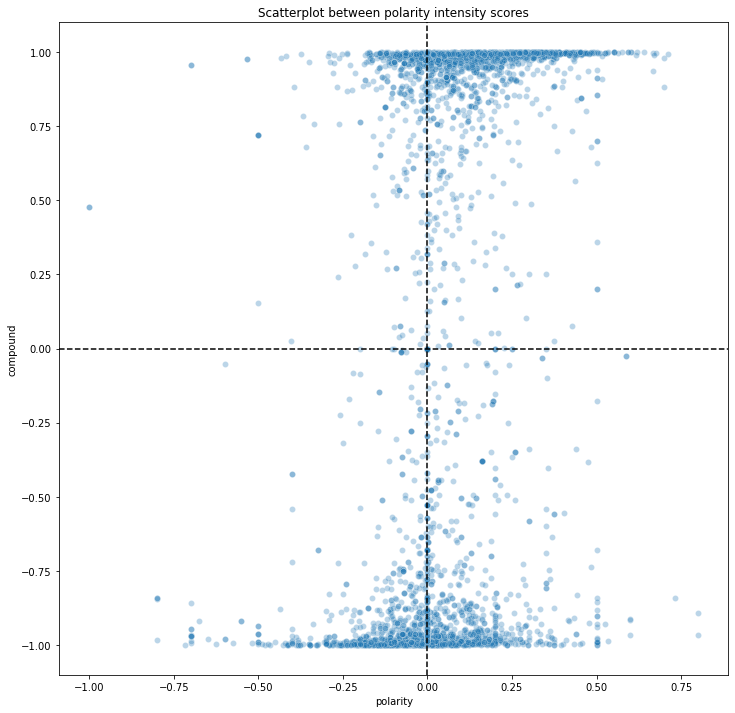

In [31]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df, x='polarity', y='compound',
                # hue='target', palette=['red', 'green'], 
                alpha=.3)
plt.axhline(0, linestyle='--', color='k')
plt.axvline(0, linestyle='--', color='k')
plt.title('Scatterplot between polarity intensity scores')
plt.savefig('./plots/final/scatterplot_intensity_scores.png')

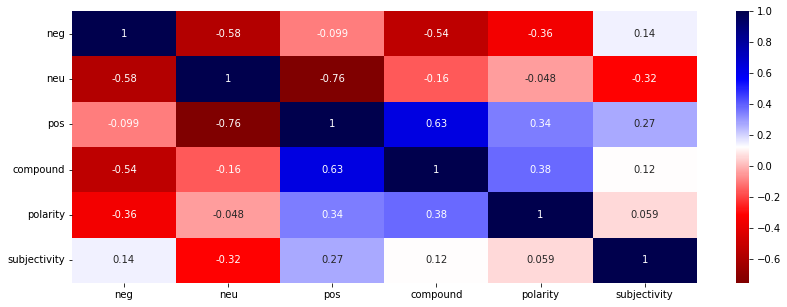

In [32]:
plt.figure(figsize = (14,5))
columns = ['neg', 'neu', 'pos', 'compound', 'polarity', 
           'subjectivity']
sns.heatmap(df[columns].corr(), annot=True, cmap='seismic_r');